# **Folium** **101**
**Author** : Sakarat Sooksang <br>
**My GitHub** : <a href=https://github.com/sakaratsooksang/Pandas101bySKR>GitHub repository</a><br>
Clone : https://github.com/sakaratsooksang/Pandas101bySKR.git

# Install package

In [54]:
! pip install folium

# Import

In [55]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import matplotlib.pyplot as plt

ในส่วนนี้จะเป็นการแนะนำถึงการใช้ Folium สำหรับการสร้าง web map เบื้องต้นอย่างง่ายโดยใช้ Folium libraly

นำเข้าข้อมูล

In [56]:
df = pd.read_csv('data_point.csv')
df.drop(['status','name_en'],axis=1,inplace=True)

In [57]:
df

,gid,code,name,lon,lat
0,265,324,ขท.ภูเก็ต,98.395443,7.887769
1,297,423,ขท.จันทบุรี,102.104605,12.615612
2,355,639,ขท.มุกดาหาร,104.691864,16.528280
3,259,622,ขท.มหาสารคาม,103.290739,16.202623
4,412,638,ขท.ศรีสะเกษที่ 1,104.333501,15.099724
...,...,...,...,...,...
708,57,620,สำนักงานทางหลวงที่ 7 (ขอนแก่น),NaN,NaN
709,58,155,สำนักงานทางหลวงที่ 8 (มหาสารคาม),NaN,NaN
710,59,630,สำนักงานทางหลวงที่ 9 (อุบลราชธานี),NaN,NaN
711,74,90,บริษัททางยกระดับดอนเมือง จำกัดมหาชน,NaN,NaN


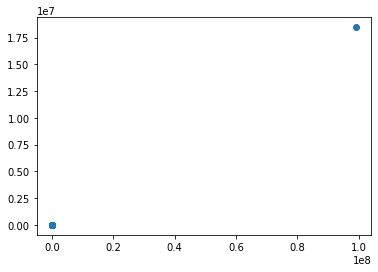

In [58]:
plt.scatter(df.lon,df.lat)

filter ข้อมูลที่เป็น outlier ออกก่อนจากการประมาณ

In [59]:
df = df.loc[(df.lat<20.33)&(df.lon<105)&(df.lon>99)]

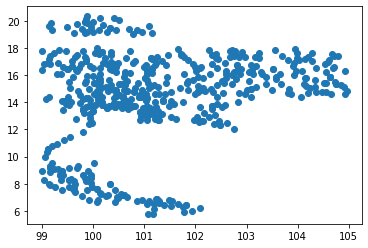

In [60]:
plt.scatter(df.lon,df.lat)

# สร้าง Basemap ด้วย folium

In [61]:
m = folium.Map(location=[13.0389, 101.4901], zoom_start=6, tiles="OpenStreetMap")

In [62]:
m

# การ add ข้อมูลเข้าสู่ map

- ทำการสร้าง Add ข้อมูล Location ลงไปใน map ตรงๆเลย

In [63]:
for i in range(len(df)) :
    folium.Marker(
        [df.lat.iloc[i], df.lon.iloc[i]],
        popup=f"<i>Location : {df.name.iloc[i]} Coordinate : [{df.lat.iloc[i]},{df.lon.iloc[i]}]</i>",
        tooltip='Click to See location'
    ).add_to(m)

In [64]:
m

popup คือ เมื่อคลิกเข้าไปจะให้แสดงอะไร เขียนด้วย html <br>
tooltip คือ เมื่อเอา cursor ไปชี้จะให้แสดงอะไรขึ้นมา

การ add ข้อมูลเข้าสู่ Cluster ก่อนแล้วจึงค่อย add เข้า map จะทำให้ข้อมูลของเราเมื่อไม่ได้ถูกซูมเข้าไปใกล้จะทำการรวมกันเป็นกลุ่มทำให้สบายตามากขึ้น

In [66]:
from folium.plugins import MarkerCluster

In [68]:
m = folium.Map(location=[13.0389, 101.4901], zoom_start=6, tiles="OpenStreetMap")
marker_cluster = MarkerCluster().add_to(m)

In [69]:
for i in range(len(df)) :
    folium.Marker(
        [df.lat.iloc[i], df.lon.iloc[i]],
        popup=f"<i>Location : {df.name.iloc[i]} Coordinate : [{df.lat.iloc[i]},{df.lon.iloc[i]}]</i>",
        tooltip='Click to See location'
    ).add_to(marker_cluster)

In [70]:
m

อีกทั้งยังมีฟังก์ชันอีกมายมายให้เราสามารถเลือกใช้ได้ เช่นการให้คลิกแล้วแสดงตำแหน่งบนแผนที่ขึ้นมาโชว์ <br>ไม่ว่าเราจะคลิกบริเวณใดก็สามารถโชว์ตำแหน่งได้

In [71]:
m.add_child(folium.LatLngPopup())